<a href="https://colab.research.google.com/github/CryptoRobotFr/TrueStrategy/blob/main/ichiCloud-stoch-ema/BacktestEGLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-binance

In [ ]:
pip install ta

<h1>Import Dataset</h1>

In [ ]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt

client = Client()

klinesT = client.get_historical_klines("EGLDUSDT", Client.KLINE_INTERVAL_15MINUTE, "01 september 2020")

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
print(df)

                        open     high      low    close           volume
timestamp                                                               
2020-09-03 03:00:00   19.710   35.000   19.710   23.950  106252.36700000
2020-09-03 03:15:00   23.944   28.000   23.699   25.932   63434.05300000
2020-09-03 03:30:00   25.959   26.000   23.000   24.260   42353.02100000
2020-09-03 03:45:00   24.392   24.941   23.201   23.640   18767.44400000
2020-09-03 04:00:00   23.601   24.003   22.150   23.493   27465.37300000
...                      ...      ...      ...      ...              ...
2021-08-12 13:45:00  129.180  129.180  127.800  127.990    3299.45420000
2021-08-12 14:00:00  128.000  128.000  126.090  126.950    6932.89390000
2021-08-12 14:15:00  126.930  127.950  125.800  125.860    5114.08730000
2021-08-12 14:30:00  125.970  126.710  125.640  125.720    6549.83990000
2021-08-12 14:45:00  125.820  126.210  124.540  124.760    5600.01990000

[32914 rows x 5 columns]


<h1>Backtest Execution</h1>

In [ ]:
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)
df['EMA50']=ta.trend.ema_indicator(df['close'], 50)
# df['RSI'] =ta.momentum.rsi(df['close'],14)
# df['Hrsi'] =df['rsi'].rolling(14).max()
# df['Lrsi'] =df['rsi'].rolling(14).min()
# df['stoch_rsi'] = (df['rsi'] - df['Lrsi']) / (df['Hrsi'] - df['Lrsi'])
# df['histo_macd']=ta.trend.macd_diff(df['close'], 26, 12, 9)
# df['EMA28']=ta.trend.ema_indicator(df['close'], 28)
# df['EMA48']=ta.trend.ema_indicator(df['close'], 48)
# df['MACD']=ta.trend.macd(df['close'], 26, 12, 9)
# df['MACD_SIGNAL']=ta.trend.macd_signal(df['close'], 26, 12, 9)
# df['MACD_HISTO']= df['MACD'] - df['MACD_SIGNAL']
# df['EMA8']=ta.trend.ema_indicator(df['close'], 8)
# df['EMA14']=ta.trend.ema_indicator(df['close'], 14)
# df['EMA50']=ta.trend.ema_indicator(df['close'], 50)
df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])
# df['MEAN_STOCH_RSI'] = ta.trend.sma_indicator(df['STOCH_RSI'], 3)
# df['SIGNAL_MEAN_STOCH_RSI'] = ta.trend.sma_indicator(df['MEAN_STOCH_RSI'], 3)
# df["TRIX0"] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(df['close'], 9, fillna=False), 9, fillna=False), 9, fillna=False)
# df['TRIX1'] =  df["TRIX0"].pct_change()*100
# df['TRIX2'] = ta.trend.sma_indicator(df['TRIX1'],22)
# df['histo'] = df['TRIX1'] - df['TRIX2']
# df['MAX_RECTANGLE9'] = df['high'].rolling(9).max()
# df['MAX_RECTANGLE26'] = df['high'].rolling(26).max()
# df['MAX_RECTANGLE52'] = df['high'].rolling(52).max()
# df['MAX_RECTANGLE9']=df['MAX_RECTANGLE9'].shift(periods=1)
# df['MAX_RECTANGLE26']=df['MAX_RECTANGLE26'].shift(periods=1)
# df['MAX_RECTANGLE52']=df['MAX_RECTANGLE52'].shift(periods=1)
df['KIJUN'] = ta.trend.ichimoku_base_line(df['high'],df['low'])
df['TENKAN'] = ta.trend.ichimoku_conversion_line(df['high'],df['low'])
df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,46).shift(periods=48)
# df['TENKAN26'] = df['TENKAN'].shift(periods=25)
# df['SHIFT26']=df['close'].shift(periods=-25)
# df['HISTO'] = df['SHIFT26']-df['TENKAN']
# df['HISTO'] = df['HISTO'].shift(periods=25)
# df['SHIFT26']=df['SHIFT26'].shift(periods=26)
df

,open,high,low,close,volume,EMA50,STOCH_RSI,KIJUN,TENKAN,SSA,SSB
timestamp,,,,,,,,,,,
2020-09-03 03:00:00,19.710,35.000,19.710,23.950,106252.36700000,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03 03:15:00,23.944,28.000,23.699,25.932,63434.05300000,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03 03:30:00,25.959,26.000,23.000,24.260,42353.02100000,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03 03:45:00,24.392,24.941,23.201,23.640,18767.44400000,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03 04:00:00,23.601,24.003,22.150,23.493,27465.37300000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12 13:45:00,129.180,129.180,127.800,127.990,3299.45420000,133.793185,0.235196,130.450,129.35,137.8250,138.060
2021-08-12 14:00:00,128.000,128.000,126.090,126.950,6932.89390000,133.524825,0.096112,130.450,129.35,138.0300,137.965
2021-08-12 14:15:00,126.930,127.950,125.800,125.860,5114.08730000,133.224244,0.000000,130.385,129.04,138.1925,137.900


<h1>Extract Best Parameters (can take some time)</h1>

       i        result
33  71.0   7195.820616
32  70.0   7206.949961
34  72.0   7663.804634
35  73.0   7823.695943
39  77.0   7866.134399
31  69.0   7983.475110
38  76.0   8048.675123
37  75.0   8056.841594
40  78.0   8088.046419
36  74.0   8103.290541
30  68.0   8200.476271
51  89.0   8223.131599
41  79.0   8227.825452
49  87.0   8377.062863
29  67.0   8435.629347
50  88.0   8444.205805
42  80.0   8470.927490
28  66.0   8609.677451
48  86.0   8640.566578
45  83.0   8698.467745
44  82.0   8811.105214
47  85.0   8836.199755
46  84.0   8858.531608
27  65.0   8973.171333
26  64.0   9115.552166
25  63.0   9195.098193
43  81.0   9236.414592
24  62.0   9975.049920
19  57.0  10008.491672
23  61.0  10051.103697
22  60.0  10081.431771
21  59.0  10101.405071
17  55.0  10152.615172
18  56.0  10195.980584
20  58.0  10851.316308
0   38.0  10962.601784
16  54.0  11130.785718
1   39.0  11482.576596
13  51.0  11739.903459
15  53.0  11841.339338
5   43.0  11926.435917
14  52.0  11957.464441
4   42.0  1

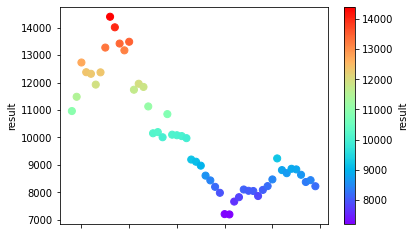

In [ ]:
dt = None
dt = pd.DataFrame(columns = ['i', 'result'])
count=0

for i in range(38,90):
    df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
    df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,46).shift(periods=48)
    dfTest = df.copy()
    usdt = 1000
    coin = 0
    fee = 0.0007
    wallet = 1000

    for index, row in dfTest.iterrows():
        #BUY
        if row['close']>row['SSA'] and row['close']>row['SSB'] and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
            buyPrice = row['close']
            coin = usdt/buyPrice
            coin = coin - fee*coin
            usdt = 0
            wallet = coin * row['close']
            #print("buy btc at ",df['close'][index]," || ",df['timestamp'][index], " || I have ",fiat,"$ and ",btc," btc")
        #SELL
        if (row['close'] < row['SSA'] or row['close'] < row['SSB']) and row['STOCH_RSI'] > 0.2 and coin > 0:
            sellPrice = row['close']
            usdt = coin*sellPrice
            usdt = usdt - fee*usdt
            coin = 0
            wallet = usdt
            #print("sell btc at ",df['close'][index]," || ",df['timestamp'][index], "|| I have ",fiat,"$ and ",btc," btc")
    myrow = {'i': i,'result': wallet}
    dt = dt.append(myrow,ignore_index=True) 
print(dt.sort_values(by=['result']))
dt.plot.scatter(x='i',y=1,c='result',s=50,colormap='rainbow') 
plt.show()    

Period : [2020-09-03 03:00:00] -> [2021-08-12 14:45:00]
Starting balance : 1000 $
Final balance : 14457.02 $
Performance vs US Dollar : 1345.7 %
Buy and Hold Performence : 420.92 %
Performance vs Buy and Hold : 219.71 %
Number of negative trades :  235
Number of positive trades :  96
Average Positive Trades :  7.84 %
Average Negative Trades :  -1.51 %
Best trade +154.98 %, the  2021-02-09 04:30:00
Worst trade -10.93 %, the  2021-02-22 10:15:00
Worst drawBack -31.0 %
Total fee :  1348.79 $
PLOT


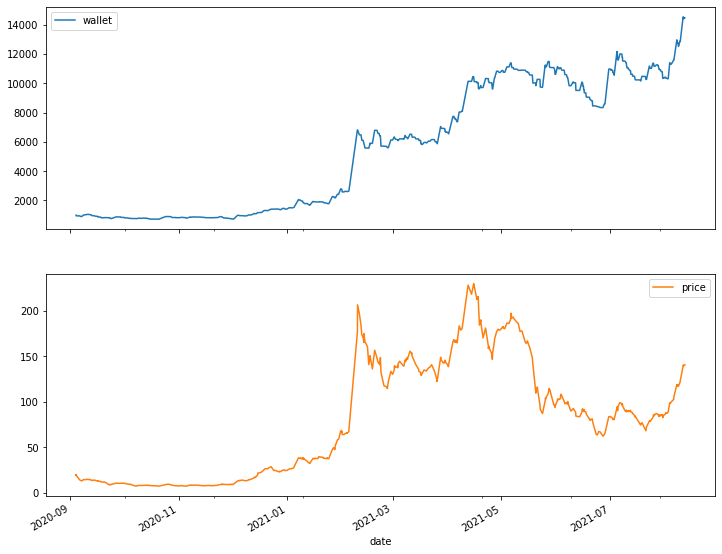

In [ ]:
dfTest = df.copy()
# dfTest = df['2021-01-01':]
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastRow = dfTest.iloc[0]
fee = 0.0007
stopLoss = 0

for index, row in dfTest.iterrows():
  #Buy
  if row['close']>row['SSA'] and row['close']>row['SSB'] and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
    buyPrice = row['close']
    # stopLoss = buyPrice - 0.05 * buyPrice
    coin = usdt / buyPrice
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",buyPrice,'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': buyPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  #Stop Loss
  # elif row['low'] < stopLoss and coin > 0:
  #   sellPrice = stopLoss
  #   usdt = coin * sellPrice
  #   frais = 0.0002 * usdt
  #   usdt = usdt - frais
  #   coin = 0
  #   wallet = usdt
  #   if wallet > lastAth:
  #     lastAth = wallet
  #   # print("Sell COIN at",sellPrice,'$ the', index)
  #   myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
  #   dt = dt.append(myrow,ignore_index=True)    

  # Sell
  elif (row['close'] < row['SSA'] or row['close'] < row['SSB']) and row['STOCH_RSI'] > 0.2 and coin > 0:
    sellPrice = row['close']
    usdt = coin * sellPrice
    frais = fee * usdt
    usdt = usdt - frais
    coin = 0
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  lastRow = row

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')
# dt